# Data Science Part Time Course

## Week 5 - Lesson 2 - Lab: Databases with Python

In this Lab the goal is connect to a database (created form a local file), read the data into Python and interact with it.

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

> Answer:
There are 3 tables:
- MessageBase
- RecipientBase
- EmployeeBase

In [2]:
import sqlite3
conn = sqlite3.connect('enron.db') 
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('MessageBase',), ('RecipientBase',), ('EmployeeBase',)]

In [3]:
fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='MessageBase';").fetchall()
print (''.join(fields[0]))

fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='RecipientBase';").fetchall()
print (''.join(fields[0]))

fields = c.execute("SELECT sql from sqlite_master WHERE type='table' and name='EmployeeBase';").fetchall()
print (''.join(fields[0]))

CREATE TABLE MessageBase (
    mid INTEGER,
    filename TEXT,
    unix_time INTEGER,
    subject TEXT,
    from_eid INTEGER,
    
    PRIMARY KEY(mid ASC),
    FOREIGN KEY(from_eid) REFERENCES Employee(eid)
)
CREATE TABLE RecipientBase (
    mid INTEGER,
    rno INTEGER,
    to_eid INTEGER,
    
    PRIMARY KEY(mid ASC, rno ASC)
    FOREIGN KEY(mid) REFERENCES Message(mid)
    FOREIGN KEY(to_eid) REFERENCES Employee(eid)
)
CREATE TABLE EmployeeBase (
                  [eid] INTEGER,
  [name] TEXT,
  [department] TEXT,
  [longdepartment] TEXT,
  [title] TEXT,
  [gender] TEXT,
  [seniority] TEXT
                  
                  )


Query the `sqlite_master` table to retrieve the **schema** of the `EmployeeBase` table.

1. What fields are there?

> `eid`, `name`, `department`, `longdepartment`, `title`, `gender`, `seniority`

2. What's the type of each of them?

> integer for `eid`, text for the rest

1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [4]:
results = c.execute("SELECT * FROM EmployeeBase LIMIT 5;").fetchall()
for row in results:
    print (row)

(1, 'John Arnold', 'Forestry', 'ENA Gas Financial', 'VP Trading', 'Male', 'Senior')
(2, 'Harry Arora', 'Forestry', 'ENA East Power', 'VP Trading', 'Male', 'Senior')
(3, 'Robert Badeer', 'Forestry', 'ENA West Power', 'Mgr Trading', 'Male', 'Junior')
(4, 'Susan Bailey', 'Legal', 'ENA Legal', 'Specialist Legal', 'Female', 'Junior')
(5, 'Eric Bass', 'Forestry', 'ENA Gas Texas', 'Trader', 'Male', 'Junior')


In [5]:
results = c.execute("SELECT * FROM MessageBase LIMIT 5;").fetchall()
for row in results:
    print (row)

(1, 'taylor-m/sent/11', 910930020, 'Cd$ CME letter', 138)
(2, 'taylor-m/sent/17', 911459940, 'Indemnification', 138)
(3, 'taylor-m/sent/18', 911463840, 'Re: Indemnification', 138)
(4, 'taylor-m/sent/23', 911874180, 'Re: Coral Energy, L.P.', 138)
(5, 'taylor-m/sent/27', 912396120, 'Bankruptcy Code revisions', 138)


In [7]:
results = c.execute("SELECT * FROM RecipientBase LIMIT 10;").fetchall()
for row in results:
    print (row)
    
# The first field is message id, the second is recipient number, and the third is the id of the recipient.
# mid, rno, to_eid

(1, 1, 59)
(2, 1, 15)
(3, 1, 15)
(4, 1, 109)
(4, 2, 49)
(4, 3, 120)
(4, 4, 59)
(5, 1, 45)
(5, 2, 53)
(6, 1, 113)


Now try other SQL statements on the local database, such as SELECT .... FROM ... WHERE ....

For example, print the records of EmployeeBase where the Gender is male 

In [8]:
results = c.execute("SELECT * FROM EmployeeBase WHERE gender = 'Male'").fetchall()
for row in results:
    print(row)

(1, 'John Arnold', 'Forestry', 'ENA Gas Financial', 'VP Trading', 'Male', 'Senior')
(2, 'Harry Arora', 'Forestry', 'ENA East Power', 'VP Trading', 'Male', 'Senior')
(3, 'Robert Badeer', 'Forestry', 'ENA West Power', 'Mgr Trading', 'Male', 'Junior')
(5, 'Eric Bass', 'Forestry', 'ENA Gas Texas', 'Trader', 'Male', 'Junior')
(6, 'Don Baughman Jr.', 'Forestry', 'ENA East Power', 'Mgr Trading', 'Male', 'Junior')
(8, 'Robert Benson', 'Forestry', 'ENA East Power', 'Dir Trading', 'Male', 'Senior')
(11, 'Rick Buy', 'Forestry', 'Enron', 'VP & CRO', 'Male', 'Senior')
(12, 'Larry Campbell', 'Other', 'ETS', 'Specialist', 'Male', 'Junior')
(13, 'Larry F. Campbell', 'Other', 'ENA East Power', 'Specialist', 'Male', 'Junior')
(14, 'Mike Carson', 'Forestry', 'ENA East Power', 'Mgr Trading', 'Male', 'Junior')
(18, 'Sean Crandall', 'Forestry', 'ENA West Power', 'Dir Trading', 'Male', 'Senior')
(19, 'Martin Cuilla', 'Forestry', 'ENA Gas Central', 'Mgr Trading', 'Male', 'Junior')
(20, 'Jeff Dasovich', 'Legal

#### Import each of the 3 tables to a Pandas Dataframes

In [51]:
import pandas as pd
employees = pd.read_sql("SELECT * FROM EmployeeBase;", conn)
recipients = pd.read_sql("SELECT * FROM RecipientBase;", conn)
messages = pd.read_sql("SELECT * FROM MessageBase;", conn)

In [16]:
messages.head(10)

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138
1,2,taylor-m/sent/17,911459940,Indemnification,138
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138
5,6,taylor-m/sent/31,912570420,Re: Position Description,138
6,7,taylor-m/sent/33,912576240,Koch,138
7,8,taylor-m/sent/40,912685080,Re: Time to Celebrate!,138
8,9,taylor-m/sent/41,912734100,Re: Vacation Request,138
9,10,taylor-m/sent/44,913166040,Re: Last Message,138


In [17]:
recipients.head()

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49


## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - How many messages have only one recepient?
    - How many messages have >= 5 recepients?
    - What's the highest number of recepients?
    - Who sent the message with the highest number of recepients?
- Plot the distribution of recepient numbers using Bokeh.

In [11]:
# How many employees are there in the company?

employees.shape[0]

156

In [12]:
# How many messages are there in the database?

messages.shape[0]

21635

In [21]:
# How many messages have only one recipient?

message_for_one = recipients.groupby(['mid'])['rno'].sum().reset_index()
message_for_one.loc[message_for_one['rno'] == 1].shape[0]

14985

In [22]:
# How many messages have more than 5 recipients?

message_for_one.loc[message_for_one['rno'] >= 1].shape[0]

21635

In [24]:
# What's the highest number of recipients?

message_for_one['rno'].max()

1653

In [33]:
# Plot distribution of recipient numbers

import matplotlib.pyplot as plt

message_for_one = message_for_one.set_index('mid')

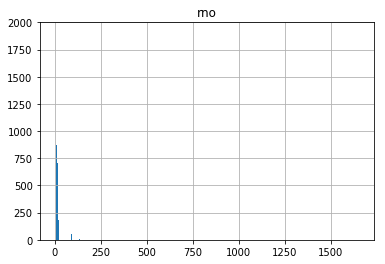

In [41]:
plt.figure(figsize=(20,20))
message_for_one.hist(bins=1000)
plt.ylim(0,2000) 
plt.show()

## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

In [45]:
male_no = employees.loc[employees['gender'] == 'Male']['gender'].sum()
female_no = employees.loc[employees['gender'] == 'Female']['gender'].sum()

# Are there more male than female employees?

male_no > female_no

True

In [48]:
gender_d

,Female,Male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,1,0
7,0,1
8,1,0
9,1,0


In [50]:
# How is gender distributed across departments?

gender_d = pd.get_dummies(employees['gender'])

,Female_x,Male_x,department,eid,gender,longdepartment,name,seniority,title,Female_y,Male_y
0,NaN,NaN,Forestry,1.0,Male,ENA Gas Financial,John Arnold,Senior,VP Trading,0,1
0,NaN,NaN,Forestry,1.0,Male,ENA Gas Financial,John Arnold,Senior,VP Trading,0,0
0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,NaN,NaN,Forestry,2.0,Male,ENA East Power,Harry Arora,Senior,VP Trading,0,1
